In [1]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from coffea import util
import numpy as np
import numba as nb
import uproot as up
from coffea import hist as coffea_hist
 
# from coffea import hist,processor
from coffea import processor
from coffea.nanoevents.methods import candidate
ak.behavior.update(candidate.behavior)
import matplotlib.pyplot as plt
import mplhep as hep
import time

from hist import Hist, axis
import hist

import pickle

import boost_histogram as bh
import os

plt.style.use(hep.style.CMS)

## file list

In [2]:
base_dir = "/data/pubfs/xiaoj/zajj/nb/ntuples/"
files = {
    2016:{
        "mc":{
            'za_qcd':[f"{base_dir}/2016_mc_za_qcd.root"],
            'za_ewk':[f"{base_dir}/2016_mc_za_ewk.root"],
            'others':[
                f"{base_dir}/2016_mc_others.root",
            ]
        },
        "data":{
            'data': [
                f"{base_dir}/2016_data_data.root",
            ]
        },
        "fake":{
            'fake': [
                f"{base_dir}/2016_fake_fake.root",
            ]
        },
        "fake_up":{
            'fake_up': [
                f"{base_dir}/2016_fake_up_fake.root",
            ]
        },
        "fake_down":{
            'fake_down': [
                f"{base_dir}/2016_fake_down_fake.root",
            ],
        },
        "JEC_up":{
            'za_qcd_JEC_up':[f"{base_dir}/2016_jesr_za_qcd.root"],
            'za_ewk_JEC_up':[f"{base_dir}/2016_jesr_za_ewk.root"],
            'others_JEC_up':[
                f"{base_dir}/2016_jesr_others2.root",
            ]
         },     
        "JEC_down":{
            'za_qcd_JEC_down':[f"{base_dir}/2016_jesr_za_qcd.root"],
            'za_ewk_JEC_down':[f"{base_dir}/2016_jesr_za_ewk.root"],
            'others_JEC_down':[
                f"{base_dir}/2016_jesr_others2.root",
            ]
         },     
        "JER_up":{
            'za_qcd_JER_up':[f"{base_dir}/2016_jesr_za_qcd.root"],
            'za_ewk_JER_up':[f"{base_dir}/2016_jesr_za_ewk.root"],
            'others_JER_up':[
                f"{base_dir}/2016_jesr_others2.root",
            ]
         },     
        "JER_down":{
            'za_qcd_JER_down':[f"{base_dir}/2016_jesr_za_qcd.root"],
            'za_ewk_JER_down':[f"{base_dir}/2016_jesr_za_ewk.root"],
            'others_JER_down':[
                f"{base_dir}/2016_jesr_others2.root",
            ]
         },     
    },
    2017:{
        "mc":{
            'za_qcd':[f"{base_dir}/2017_mc_za_qcd.root"],
            'za_ewk':[f"{base_dir}/2017_mc_za_ewk.root"],
            'others':[
                f"{base_dir}/2017_mc_others.root",
            ]
        },
        "data":{
            'data': [
                f"{base_dir}/2017_data_data.root",
            ]
        },
        "fake":{
            'fake': [f"{base_dir}/2017_fake_fake.root"],
        },
        "fake_up":{
            'fake_up': [f"{base_dir}/2017_fake_up_fake.root"],
        },
        "fake_down":{
            'fake_down': [f"{base_dir}/2017_fake_down_fake.root"],
        },
        "JEC_up":{
            'za_qcd_JEC_up':[f"{base_dir}/2017_jesr_za_qcd.root"],
            'za_ewk_JEC_up':[f"{base_dir}/2017_jesr_za_ewk.root"],
            'others_JEC_up':[
                f"{base_dir}/2017_jesr_others.root",
            ]
         },      
        "JEC_down":{
            'za_qcd_JEC_down':[f"{base_dir}/2017_jesr_za_qcd.root"],
            'za_ewk_JEC_down':[f"{base_dir}/2017_jesr_za_ewk.root"],
            'others_JEC_down':[
                f"{base_dir}/2017_jesr_others.root",
            ]
         },      
        "JER_up":{
            'za_qcd_JER_up':[f"{base_dir}/2017_jesr_za_qcd.root"],
            'za_ewk_JER_up':[f"{base_dir}/2017_jesr_za_ewk.root"],
            'others_JER_up':[
                f"{base_dir}/2017_jesr_others.root",
            ]
         },      
        "JER_down":{
            'za_qcd_JER_down':[f"{base_dir}/2017_jesr_za_qcd.root"],
            'za_ewk_JER_down':[f"{base_dir}/2017_jesr_za_ewk.root"],
            'others_JER_down':[
                f"{base_dir}/2017_jesr_others.root",
            ]
         },      
    },
}


In [3]:
# data_list = {'DoubleMuon_Run2018A':data_list['DoubleMuon_Run2018A']}
files

{2016: {'mc': {'za_qcd': ['/data/pubfs/xiaoj/zajj/nb/ntuples//2016_mc_za_qcd.root'],
   'za_ewk': ['/data/pubfs/xiaoj/zajj/nb/ntuples//2016_mc_za_ewk.root'],
   'others': ['/data/pubfs/xiaoj/zajj/nb/ntuples//2016_mc_others.root']},
  'data': {'data': ['/data/pubfs/xiaoj/zajj/nb/ntuples//2016_data_data.root']},
  'fake': {'fake': ['/data/pubfs/xiaoj/zajj/nb/ntuples//2016_fake_fake.root']},
  'fake_up': {'fake_up': ['/data/pubfs/xiaoj/zajj/nb/ntuples//2016_fake_up_fake.root']},
  'fake_down': {'fake_down': ['/data/pubfs/xiaoj/zajj/nb/ntuples//2016_fake_down_fake.root']},
  'JEC_up': {'za_qcd_JEC_up': ['/data/pubfs/xiaoj/zajj/nb/ntuples//2016_jesr_za_qcd.root'],
   'za_ewk_JEC_up': ['/data/pubfs/xiaoj/zajj/nb/ntuples//2016_jesr_za_ewk.root'],
   'others_JEC_up': ['/data/pubfs/xiaoj/zajj/nb/ntuples//2016_jesr_others2.root']},
  'JEC_down': {'za_qcd_JEC_down': ['/data/pubfs/xiaoj/zajj/nb/ntuples//2016_jesr_za_qcd.root'],
   'za_ewk_JEC_down': ['/data/pubfs/xiaoj/zajj/nb/ntuples//2016_jesr_z

In [4]:
def get_vals(_vals, _low, _high, clip = True, clip_diff = 0.000001):
    """Try this"""

    if clip:
        _new_vals = np.clip(ak.fill_none(_vals, -999.), _low+clip_diff, _high-clip_diff)
    else:
        _new_vals = ak.fill_none(_vals, -999.)
    return _new_vals
        

## Processor

In [5]:
class MyProcessor(processor.ProcessorABC):
    def __init__(self, **kwargs):
        self.year = 2016
        if "year" in kwargs:
            self.is_mc = kwargs["year"]
        self.is_mc = True
        if "is_mc" in kwargs:
            self.is_mc = kwargs["is_mc"]
        self.uncer = "nom" # remember to only use: nom, JEC_up, JEC_down, JER_up, JER_down
        if "uncer" in kwargs:
            self.uncer = kwargs["uncer"]
        self.is_fake = False
        if "is_fake" in kwargs:
            self.is_fake = kwargs["is_fake"]
        self.channel = "ALL"
        if "channel" in kwargs:
            self.channel = kwargs["channel"]
        # signal region or control region
        self.region = "SR"
        if "region" in kwargs:
            self.region = kwargs["region"]
        # self.fake_unc = "nom"
        # if "fake_unc" in kwargs:
        #     self.fake_unc = kwargs["fake_unc"]
        print(kwargs)
        
        if self.region=="SR":
            self._accumulator = processor.dict_accumulator(
                {
                    'mjj': coffea_hist.Hist(
                        "Events",
                        coffea_hist.Cat("dataset", "Dataset"),
                        coffea_hist.Bin('x', r'$m_{jj}$ (GeV)', 8, 500, 2000),
                    ),
                    'mll': coffea_hist.Hist(
                        "Events",
                        coffea_hist.Cat("dataset", "Dataset"),
                        coffea_hist.Bin('x', r'$m_{ll}$ (GeV)', 18, 70, 110),
                    ),
                    'mllv1': coffea_hist.Hist(
                        "Events",
                        coffea_hist.Cat("dataset", "Dataset"),
                        coffea_hist.Bin('x', r'$m_{ll}$ (GeV)', 12, 70, 110),
                    ),
                    'mjj_detajj': coffea_hist.Hist(
                        "Events",
                        coffea_hist.Cat("dataset", "Dataset"),
                        coffea_hist.Bin('x', r'$m_{jj}$ (GeV)', [500, 800, 1200, 2000]),
                        coffea_hist.Bin('y', r'$|\Delta \eta _{jj}|$ (GeV)', [2.5,4.5,6,10]),
                    ),
                }
            )
        else:
            self._accumulator = processor.dict_accumulator(
                {
                    'lowmjj': coffea_hist.Hist(
                        "Events",
                        coffea_hist.Cat("dataset", "Dataset"),
                        coffea_hist.Bin('x', r'$m_{jj}$ (GeV)', 5, 150, 500),
                    ),
                    'mll': coffea_hist.Hist(
                        "Events",
                        coffea_hist.Cat("dataset", "Dataset"),
                        coffea_hist.Bin('x', r'$m_{ll}$ (GeV)', 18, 70, 110),
                    ),
                    'mllv1': coffea_hist.Hist(
                        "Events",
                        coffea_hist.Cat("dataset", "Dataset"),
                        coffea_hist.Bin('x', r'$m_{ll}$ (GeV)', 12, 70, 110),
                    ),
                }
            )

    @property
    def accumulator(self):
        return self._accumulator

    def process(self, events):
        output = self.accumulator.identity()
        dataset = events.metadata['dataset']
        lumi = {
            2016: 36.33,
            2017: 41.53,
            2018: 59.74,
        }
        puid = {
            2016: "puIdMedium",
            2017: "puIdTight",
            2018: "puIdTight",
        }
        puid_wgt = {
            2016: "M",
            2017: "T",
            2018: "T",
        }
        # ALL: include MB ME EB EE
        # MB: muon barrel
        # ME: muon endcap
        # EB: electron barrel
        # EE: electron endcap
        sel_nlep_1 = ((events.HLT_Mu1>0) | (events.HLT_Mu1>0)) & (events.lep==13) & (events.nloosemus < 3) & (events.nlooseeles == 0)
        sel_nlep_2 = ((events.HLT_Ele1>0) | (events.HLT_Ele2>0)) & (events.lep==11) & (events.nloosemus == 0) & (events.nlooseeles < 3)
        if self.channel=="ALL":
            sel_nlep = (sel_nlep_1 | sel_nlep_2)
        elif self.channel=="MB" or self.channel=="ME":
            sel_nlep = (sel_nlep_1)
        else:
            sel_nlep = (sel_nlep_2)
        events = events.mask[sel_nlep]

        # lepton selections
        lep_mass = (abs(events.lep) == 11 * 0.00051) + (abs(events.lep) == 13 * 0.10566)
        lep1 = ak.zip({
            "pt": events.ptlep1,
            "eta": events.etalep1,
            "phi": events.philep1,
            "mass": lep_mass,
            "charge": np.ones(len(events.ptlep1)),
            "pdgId": events.lep,
        }, with_name="PtEtaPhiMCandidate")

        lep2 = ak.zip({
            "pt": events.ptlep2,
            "eta": events.etalep2,
            "phi": events.philep2,
            "mass": lep_mass,
            "charge": -1 * np.ones(len(events.ptlep2)),
            "pdgId": events.lep,
        }, with_name="PtEtaPhiMCandidate")

        sel_lep_1 = (lep1.pt > 25) & (lep2.pt > 25) & (abs(lep1.eta) < 2.5) & (abs(lep2.eta) < 2.5) & (lep1.pdgId == 11) 
        sel_lep_2 = (lep1.pt > 20) & (lep2.pt > 20) & (abs(lep1.eta) < 2.4) & (abs(lep2.eta) < 2.4) & (lep1.pdgId == 13)
        # zpole = lep1 + lep2 ### z boson
        sel_lep_4 = (events.massVlep > 70) & (events.massVlep < 110)

        events = events.mask[(sel_lep_1 | sel_lep_2) & sel_lep_4]

        # photon selections
        drla_new = (events.drla!=10)*events.drla
        drla2_new = (events.drla2!=10)*events.drla2
        # photon selections
        pho = ak.zip({
            "pt": events.photonet,
            "eta": events.photoneta,
            "phi": events.photonphi,
            "energy": events.photone,
            "charge": np.zeros(len(events.photonet)),
            "pdgId": 22*np.ones(len(events.photonet)),
            "passEleVeto": events.passEleVeto,
            "isTrue": events.isTrue,
            "isprompt": events.isprompt,
            "drl1a": drla_new,
            "drl2a": drla2_new,
            "m_Vgamma": events.Mva,
        }, with_name="PtEtaPhiECandidate")


        if self.channel=="ALL":
            sel_pho_1 = (pho.pt > 20) & (((abs(pho.eta)<2.5) & (abs(pho.eta)>1.566)) | (abs(pho.eta)<1.4442))
        elif self.channel=="MB" or self.channel=="EB":
            sel_pho_1 = (pho.pt > 20) & (abs(pho.eta)<1.4442)
        else:
            sel_pho_1 = (pho.pt > 20) & ((abs(pho.eta)<2.5) & (abs(pho.eta)>1.566))

        if self.is_mc:
            sel_pho_2 = (pho.drl1a > 0.7) & (pho.drl2a > 0.7) # & (pho.isprompt==1) & (pho.passEleVeto==1)
        elif self.is_fake:
            sel_pho_2 = (pho.drl1a > 0.7) & (pho.drl2a > 0.7) & (pho.isprompt!=1) # & (pho.passEleVeto==1)
        else:
            sel_pho_2 = (pho.drl1a > 0.7) & (pho.drl2a > 0.7) # & (pho.passEleVeto)

        sel_pho_3 = (pho.m_Vgamma > 100)

        events = events.mask[sel_pho_1 & sel_pho_2 & sel_pho_3]

        # jet selections
        if self.uncer=="nom":
            postfix=""
        else:
            postfix=f"_{self.uncer}"
        jet1 = ak.zip({
            "pt": events[f"jet1pt{postfix}"],
            "eta": events[f"jet1eta{postfix}"],
            "phi": events[f"jet1phi{postfix}"],
            "energy": events[f"jet1e{postfix}"],
            "charge": np.zeros(len(events[f"jet1pt{postfix}"])),
            "dr_a": events[f"drj1a{postfix}"],
            "dr_l1": events[f"drj1l{postfix}"],
            "dr_l2": events[f"drj1l2{postfix}"],
            "puId": events[f"jet1{puid[self.year]}{postfix}"],
        }, with_name="PtEtaPhiECandidate")
        jet2 = ak.zip({
            "pt": events[f"jet2pt{postfix}"],
            "eta": events[f"jet2eta{postfix}"],
            "phi": events[f"jet2phi{postfix}"],
            "energy": events[f"jet2e{postfix}"],
            "charge": np.zeros(len(events[f"jet2pt{postfix}"])),
            "dr_a": events[f"drj2a{postfix}"],
            "dr_l1": events[f"drj2l{postfix}"],
            "dr_l2": events[f"drj2l2{postfix}"],
            "puId": events[f"jet2{puid[self.year]}{postfix}"],
        }, with_name="PtEtaPhiECandidate")

        if self.year == 2017:
            sel_jet_1 = (((jet1.pt > 30) & (jet1.pt < 50) & (jet1.puId==1) & (abs(jet1.eta)>3.14) | (abs(jet1.eta)<2.65)) | (jet1.pt > 50)) & (abs(jet1.eta) < 4.7) #  
            sel_jet_2 = (((jet2.pt > 30) & (jet2.pt < 50) & (jet2.puId==1) & (abs(jet2.eta)>3.14) | (abs(jet2.eta)<2.65)) | (jet2.pt > 50)) & (abs(jet2.eta) < 4.7) #  
        else:
            sel_jet_1 = (((jet1.pt > 30) & (jet1.pt < 50) & (jet1.puId==1)) | (jet1.pt > 50)) & (abs(jet1.eta) < 4.7) #  & (abs(jet1.eta)<3.14) & (abs(jet1.eta)>2.65)
            sel_jet_2 = (((jet2.pt > 30) & (jet2.pt < 50) & (jet2.puId==1)) | (jet2.pt > 50)) & (abs(jet2.eta) < 4.7) #  & (abs(jet2.eta)<3.14) & (abs(jet2.eta)>2.65)
        sel_jet_3 = (jet1.dr_a > 0.5) & (jet1.dr_l1 > 0.5) & (jet1.dr_l2 > 0.5) & \
            (jet2.dr_a > 0.5) & (jet2.dr_l1 > 0.5) & (jet2.dr_l2 > 0.5)
        if self.region=="SR":
            sel_jet_4 = (events[f"Mjj{postfix}"] > 500) & (abs(jet1.eta-jet2.eta) > 2.5)
        else:
            sel_jet_4 = (events[f"Mjj{postfix}"] > 150) & (events[f"Mjj{postfix}"] < 500)
        sel_jet_5 = jet1.delta_r(jet2) > 0.5
        # sel_jet_3 = (events.Mjj > 150) & (events.Mjj < 400)

        events = events.mask[sel_jet_1 & sel_jet_2 & sel_jet_3 & sel_jet_4 & sel_jet_5]

        # optimal selections
        sel_opt_1 = (events[f"zepp{postfix}"] < 2.4)
        za = (lep1 + lep2 + pho)
        dijet = (jet1 + jet2)
        sel_opt_2 = (abs(za.delta_phi(dijet)) > 1.9)

        events = events.mask[sel_opt_1 & sel_opt_2]
        
        # total mask, new objects
        tot_mask = (events.event != None)
        # weights
        tot_mask = ak.fill_none(tot_mask, False) # will remove None events
        events = events[tot_mask]
        pho = pho[tot_mask]
        jet1 = jet1[tot_mask]
        jet2 = jet2[tot_mask]
        if self.is_mc:
            # eletron id sf
            eid_scale = (events.lep == 11) * events.ele1_id_scale * events.ele1_reco_scale * events.ele2_id_scale * events.ele2_reco_scale * events.ele_hlt_scale
            # muon id sf
            mid_scale = (events.lep == 13) * events.muon1_iso_scale * events.muon1_id_scale * events.muon2_id_scale * events.muon2_iso_scale * events.muon_hlt_scale
            wgt = events.scalef * events.pileupWeight * events.prefWeight * (eid_scale + mid_scale) * events.photon_id_scale * events.photon_veto_scale * events[f"puIdweight_{puid_wgt[self.year]}{postfix}"] * lumi[self.year]
            # print(wgt)
        elif self.is_fake:
            wgt = events.scalef
        else:
            wgt = np.ones(len(events.run))
        # print(ak.to_list(wgt[0:20]))
        vals = {}
        if self.region=="SR":
            vals['mjj'] = get_vals(events[f"Mjj{postfix}"], 500, 2000)
            vals['mll'] = get_vals(events.massVlep, 70, 110)
            vals['mllv1'] = get_vals(events.massVlep, 70, 110)
            vals['detajj'] = get_vals(abs(jet1.eta-jet2.eta), 2.5, 10)

            output["mjj"].fill(dataset = dataset, x = vals['mjj'], weight = wgt)
            output["mll"].fill(dataset = dataset, x = vals['mll'], weight = wgt)
            output["mllv1"].fill(dataset = dataset, x = vals['mllv1'], weight = wgt)
            output["mjj_detajj"].fill(dataset = dataset, x = vals['mjj'], y = vals['detajj'], weight = wgt)
        else:
            vals['lowmjj'] = get_vals(events[f"Mjj{postfix}"], 150, 500)
            vals['mll'] = get_vals(events.massVlep, 70, 110)
            vals['mllv1'] = get_vals(events.massVlep, 70, 110)

            output["lowmjj"].fill(dataset = dataset, x = vals['lowmjj'], weight = wgt)
            output["mll"].fill(dataset = dataset, x = vals['mll'], weight = wgt)
            output["mllv1"].fill(dataset = dataset, x = vals['mllv1'], weight = wgt)
        
        return output

    def postprocess(self, accumulator):
        return accumulator

In [6]:
# file_list

## run

## 2016

In [7]:
mc_hists_2016 = processor.run_uproot_job(files[2016]['mc'],
                                'ZPKUCandidates',
                                MyProcessor(year=2016,is_mc=True,uncer="nom",is_fake=False,channel="EB",region="SR"),
                                processor.futures_executor,
                                chunksize=10000,
                                executor_args = {'schema': BaseSchema, 'workers': 4}
                                )

{'year': 2016, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Preprocessing:   0%|          | 0/3 [00:00<?, ?file/s]

Processing:   0%|          | 0/53 [00:00<?, ?chunk/s]

In [8]:
data_hists_2016 = processor.run_uproot_job(files[2016]['data'],
                                'ZPKUCandidates',
                                MyProcessor(year=2016,is_mc=False,uncer="nom",is_fake=False,channel="EB",region="SR"),
                                processor.futures_executor,
                                chunksize=10000,
                                executor_args = {'schema': BaseSchema, 'workers': 4}
                                )

{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Preprocessing:   0%|          | 0/1 [00:00<?, ?file/s]

Processing:   0%|          | 0/4 [00:00<?, ?chunk/s]

In [41]:
fake_hists_2016 = processor.run_uproot_job(files[2016]['fake'],
                                'ZPKUCandidates',
                                MyProcessor(year=2016,is_mc=False,uncer="nom",is_fake=True,channel="EB",region="SR"),
                                processor.futures_executor,
                                chunksize=10000,
                                executor_args = {'schema': BaseSchema, 'workers': 4}
                                )

{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

In [42]:
fake_up_hists_2016 = processor.run_uproot_job(files[2016]['fake_up'],
                                'ZPKUCandidates',
                                MyProcessor(year=2016,is_mc=False,uncer="nom",is_fake=True,channel="EB",region="SR"),
                                processor.futures_executor,
                                chunksize=10000,
                                executor_args = {'schema': BaseSchema, 'workers': 4}
                                )

{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

In [16]:
fake_down_hists_2016 = processor.run_uproot_job(files[2016]['fake_down'],
                                'ZPKUCandidates',
                                MyProcessor(year=2016,is_mc=False,uncer="nom",is_fake=True,channel="EB",region="SR"),
                                processor.futures_executor,
                                chunksize=10000,
                                executor_args = {'schema': BaseSchema, 'workers': 4}
                                )

{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'SR'}


Preprocessing:   0%|          | 0/1 [00:00<?, ?file/s]

Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

### 2016 all

In [8]:
cate_cfg = {
    "mc":{"is_mc":True,"is_fake":False,"uncer":"nom"},
    "data":{"is_mc":False,"is_fake":False,"uncer":"nom"},
    "fake":{"is_mc":False,"is_fake":True,"uncer":"nom"},
    "fake_up":{"is_mc":False,"is_fake":True,"uncer":"nom"},
    "fake_down":{"is_mc":False,"is_fake":True,"uncer":"nom"},
    "JEC_up":{"is_mc":True,"is_fake":False,"uncer":"JEC_up"},
    "JEC_down":{"is_mc":True,"is_fake":False,"uncer":"JEC_down"},
    "JER_up":{"is_mc":True,"is_fake":False,"uncer":"JER_up"},
    "JER_down":{"is_mc":True,"is_fake":False,"uncer":"JER_down"},
}
hist_2016 = {}
for iregion in ["SR","CR"]:
    hist_2016[iregion] = {}
    for ichannel in ["ALL","EB","MB","EE","ME"]:
        hist_2016[iregion][ichannel] = {}
        for icate in ['mc','data','fake','fake_up','fake_down','JEC_up','JEC_down','JER_up','JER_down']:
            print("=========> 2016","channel:",ichannel,"icate:",icate)
            hist_2016[iregion][ichannel][icate] = processor.run_uproot_job(files[2016][icate],
                                    'ZPKUCandidates',
                                    MyProcessor(year=2016,is_mc=cate_cfg[icate]["is_mc"],uncer=cate_cfg[icate]["uncer"],is_fake=cate_cfg[icate]["is_fake"],channel=ichannel,region=iregion),
                                    processor.futures_executor,
                                    chunksize=10000,
                                    executor_args = {'schema': BaseSchema, 'workers': 22}
                                    )

=========> 2016 channel: ALL icate: mc
{'year': 2016, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'ALL', 'region': 'SR'}


Processing:   0%|          | 0/53 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: data
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'ALL', 'region': 'SR'}


Preprocessing:   0%|          | 0/1 [00:00<?, ?file/s]

Processing:   0%|          | 0/4 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: fake
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ALL', 'region': 'SR'}


Preprocessing:   0%|          | 0/1 [00:00<?, ?file/s]

Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: fake_up
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ALL', 'region': 'SR'}


Preprocessing:   0%|          | 0/1 [00:00<?, ?file/s]

Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: fake_down
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ALL', 'region': 'SR'}


Preprocessing:   0%|          | 0/1 [00:00<?, ?file/s]

Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: JEC_up
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'ALL', 'region': 'SR'}


Preprocessing:   0%|          | 0/3 [00:00<?, ?file/s]

Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: JEC_down
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'ALL', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: JER_up
{'year': 2016, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'ALL', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: JER_down
{'year': 2016, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'ALL', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: mc
{'year': 2016, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/53 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: data
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/4 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: fake
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: fake_up
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: fake_down
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: JEC_up
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: JEC_down
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: JER_up
{'year': 2016, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: JER_down
{'year': 2016, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: mc
{'year': 2016, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/53 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: data
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/4 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: fake
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: fake_up
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: fake_down
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: JEC_up
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: JEC_down
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: JER_up
{'year': 2016, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: JER_down
{'year': 2016, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: mc
{'year': 2016, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/53 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: data
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/4 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: fake
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: fake_up
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: fake_down
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: JEC_up
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: JEC_down
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: JER_up
{'year': 2016, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: JER_down
{'year': 2016, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: mc
{'year': 2016, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/53 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: data
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/4 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: fake
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: fake_up
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: fake_down
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: JEC_up
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: JEC_down
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: JER_up
{'year': 2016, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: JER_down
{'year': 2016, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: mc
{'year': 2016, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/53 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: data
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/4 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: fake
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: fake_up
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: fake_down
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: JEC_up
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: JEC_down
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: JER_up
{'year': 2016, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ALL icate: JER_down
{'year': 2016, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: mc
{'year': 2016, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/53 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: data
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/4 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: fake
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: fake_up
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: fake_down
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: JEC_up
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: JEC_down
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: JER_up
{'year': 2016, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EB icate: JER_down
{'year': 2016, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: mc
{'year': 2016, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/53 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: data
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/4 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: fake
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: fake_up
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: fake_down
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: JEC_up
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: JEC_down
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: JER_up
{'year': 2016, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: MB icate: JER_down
{'year': 2016, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: mc
{'year': 2016, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/53 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: data
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/4 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: fake
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: fake_up
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: fake_down
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: JEC_up
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: JEC_down
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: JER_up
{'year': 2016, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: EE icate: JER_down
{'year': 2016, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: mc
{'year': 2016, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/53 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: data
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/4 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: fake
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: fake_up
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: fake_down
{'year': 2016, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: JEC_up
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: JEC_down
{'year': 2016, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: JER_up
{'year': 2016, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2016 channel: ME icate: JER_down
{'year': 2016, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

In [12]:
if not os.path.exists("plots"):
    os.mkdir("plots")
with open("plots/plot_2016_tmp.pkl", "wb") as f:
    pickle.dump(hist_2016, f)
with open("plots/plot_2016_tmp.pkl", "rb") as f:
    hist_2016 = pickle.load(f)

## 2017

In [13]:
hist_2017 = {}
for iregion in ["SR","CR"]:
    hist_2017[iregion] = {}
    for ichannel in ["ALL","EB","MB","EE","ME"]:
        hist_2017[iregion][ichannel] = {}
        for icate in ['mc','data','fake','fake_up','fake_down','JEC_up','JEC_down','JER_up','JER_down']:
            print("=========> 2017","channel:",ichannel,"icate:",icate)
            hist_2017[iregion][ichannel][icate] = processor.run_uproot_job(files[2017][icate],
                                    'ZPKUCandidates',
                                    MyProcessor(year=2017,is_mc=cate_cfg[icate]["is_mc"],uncer=cate_cfg[icate]["uncer"],is_fake=cate_cfg[icate]["is_fake"],channel=ichannel,region=iregion),
                                    processor.futures_executor,
                                    chunksize=10000,
                                    executor_args = {'schema': BaseSchema, 'workers': 22}
                                    )


=========> 2017 channel: ALL icate: mc
{'year': 2017, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'ALL', 'region': 'SR'}


Preprocessing:   0%|          | 0/3 [00:00<?, ?file/s]

Processing:   0%|          | 0/50 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: data
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'ALL', 'region': 'SR'}


Preprocessing:   0%|          | 0/1 [00:00<?, ?file/s]

Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: fake
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ALL', 'region': 'SR'}


Preprocessing:   0%|          | 0/1 [00:00<?, ?file/s]

Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: fake_up
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ALL', 'region': 'SR'}


Preprocessing:   0%|          | 0/1 [00:00<?, ?file/s]

Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: fake_down
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ALL', 'region': 'SR'}


Preprocessing:   0%|          | 0/1 [00:00<?, ?file/s]

Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: JEC_up
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'ALL', 'region': 'SR'}


Preprocessing:   0%|          | 0/3 [00:00<?, ?file/s]

Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: JEC_down
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'ALL', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: JER_up
{'year': 2017, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'ALL', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: JER_down
{'year': 2017, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'ALL', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: mc
{'year': 2017, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/50 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: data
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: fake
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: fake_up
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: fake_down
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: JEC_up
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: JEC_down
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: JER_up
{'year': 2017, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: JER_down
{'year': 2017, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'EB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: mc
{'year': 2017, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/50 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: data
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: fake
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: fake_up
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: fake_down
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: JEC_up
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: JEC_down
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: JER_up
{'year': 2017, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: JER_down
{'year': 2017, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'MB', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: mc
{'year': 2017, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/50 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: data
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: fake
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: fake_up
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: fake_down
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: JEC_up
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: JEC_down
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: JER_up
{'year': 2017, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: JER_down
{'year': 2017, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'EE', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: mc
{'year': 2017, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/50 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: data
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: fake
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: fake_up
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: fake_down
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: JEC_up
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: JEC_down
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: JER_up
{'year': 2017, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: JER_down
{'year': 2017, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'ME', 'region': 'SR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: mc
{'year': 2017, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/50 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: data
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: fake
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: fake_up
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: fake_down
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: JEC_up
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: JEC_down
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: JER_up
{'year': 2017, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ALL icate: JER_down
{'year': 2017, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'ALL', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: mc
{'year': 2017, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/50 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: data
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: fake
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: fake_up
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: fake_down
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: JEC_up
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: JEC_down
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: JER_up
{'year': 2017, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EB icate: JER_down
{'year': 2017, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'EB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: mc
{'year': 2017, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/50 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: data
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: fake
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: fake_up
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: fake_down
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: JEC_up
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: JEC_down
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: JER_up
{'year': 2017, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: MB icate: JER_down
{'year': 2017, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'MB', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: mc
{'year': 2017, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/50 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: data
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: fake
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: fake_up
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: fake_down
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: JEC_up
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: JEC_down
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: JER_up
{'year': 2017, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: EE icate: JER_down
{'year': 2017, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'EE', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: mc
{'year': 2017, 'is_mc': True, 'uncer': 'nom', 'is_fake': False, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/50 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: data
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': False, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: fake
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: fake_up
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: fake_down
{'year': 2017, 'is_mc': False, 'uncer': 'nom', 'is_fake': True, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: JEC_up
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_up', 'is_fake': False, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: JEC_down
{'year': 2017, 'is_mc': True, 'uncer': 'JEC_down', 'is_fake': False, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: JER_up
{'year': 2017, 'is_mc': True, 'uncer': 'JER_up', 'is_fake': False, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

=========> 2017 channel: ME icate: JER_down
{'year': 2017, 'is_mc': True, 'uncer': 'JER_down', 'is_fake': False, 'channel': 'ME', 'region': 'CR'}


Processing:   0%|          | 0/52 [00:00<?, ?chunk/s]

In [14]:
with open("plots/plot_2017_tmp.pkl", "wb") as f:
    pickle.dump(hist_2017, f)
with open("plots/plot_2017_tmp.pkl", "rb") as f:
    hist_2017 = pickle.load(f)

In [ ]:
# a = hist.Hist(hist_2017["EB"]['fake_down']['mll'].to_boost())
# a[{'dataset':'fake'}].plot()
# a[{'dataset':'fake'}].sum

In [ ]:
# a=hist.Hist(hist_2017["SR"]["ALL"]["JEC_up"]["mjj"].to_boost())
# a[{"dataset":"za_ewk"}]

## Reorganize plots

### 2016

In [15]:
restruct_hist_2016 = {}
for iregion in hist_2016:
    restruct_hist_2016[iregion] = {}
    for ichannel in hist_2016[iregion]:
        restruct_hist_2016[iregion][ichannel] = {}
        # print("===>",ichannel)
        for icate in hist_2016[iregion][ichannel]:
            # print("======>",icate)
            for ivar in hist_2016[iregion][ichannel][icate]:
                # print("=========>",ivar)
                if ivar in restruct_hist_2016[iregion][ichannel].keys():
                    pass
                else:
                    restruct_hist_2016[iregion][ichannel][ivar] = {}
                htmp = hist.Hist(hist_2016[iregion][ichannel][icate][ivar].to_boost())
                for isp in htmp.axes['dataset']:
                    # print("============>",isp)
                    if len(htmp[{'dataset':isp}].axes) == 2:
                        h2d_tmp = htmp[{'dataset':isp}]
                        # unroll 2D histogram -> 1D histogram
                        bin_value = h2d_tmp.values()
                        bin_variance = h2d_tmp.variances()

                        unroll_htmp = hist.Hist(
                            hist.axis.Regular((bin_value).size, 0, (bin_value).size),
                            name = "x",
                            storage = hist.storage.Weight(),
                            label = f"{h2d_tmp.axes.label[0]}:{h2d_tmp.axes.label[1]}",
                        )
                        unroll_htmp[...] = np.stack([bin_value.flatten('F'), bin_variance.flatten('F')], axis=-1)
                        restruct_hist_2016[iregion][ichannel][ivar][isp] = unroll_htmp
                    else:
                        restruct_hist_2016[iregion][ichannel][ivar][isp] = htmp[{'dataset':isp}]


In [16]:
restruct_hist_2016["SR"]["ALL"]["mjj_detajj"]

{'others': Hist(Regular(9, 0, 9, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=13.0386, variance=8.44389),
 'za_ewk': Hist(Regular(9, 0, 9, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=66.2374, variance=0.27494),
 'za_qcd': Hist(Regular(9, 0, 9, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=155.533, variance=37.5334),
 'data': Hist(Regular(9, 0, 9, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=290, variance=290),
 'fake': Hist(Regular(9, 0, 9, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=85.53, variance=24.9471),
 'fake_up': Hist(Regular(9, 0, 9, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=103.71, variance=36.0057),
 'fake_down': Hist(Regular(9, 0, 9, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=67.26, variance=16.4912),
 'others_JEC_up': Hist(Regular(9, 0, 9, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=13.0188, variance=5.78352),
 'za_ewk_JEC_up': Hist(Regular(9, 0, 9

In [17]:
# add total prediction plots
for iregion in restruct_hist_2016:
    for ichannel in restruct_hist_2016[iregion]:
        # print("===>",ichannel)
        for ivar in restruct_hist_2016[iregion][ichannel]:
            # print("======>",ivar)
            htmp=0
            htmp_up=0
            htmp_down=0
            for isp in ['za_qcd','za_ewk','others','fake']:
                htmp += restruct_hist_2016[iregion][ichannel][ivar][isp]
            for isp in ['za_qcd_JEC_up','za_ewk_JEC_up','others_JEC_up','za_qcd_JER_up','za_ewk_JER_up','others_JER_up','fake_up','fake']:
                htmp_up += restruct_hist_2016[iregion][ichannel][ivar][isp]
            for isp in ['za_qcd_JEC_down','za_ewk_JEC_down','others_JEC_down','za_qcd_JER_down','za_ewk_JER_down','others_JER_down','fake_down','fake']:
                htmp_down += restruct_hist_2016[iregion][ichannel][ivar][isp]
            restruct_hist_2016[iregion][ichannel][ivar]['total_pred'] = htmp
            restruct_hist_2016[iregion][ichannel][ivar]['total_pred_up'] = htmp_up+htmp*(-1)
            restruct_hist_2016[iregion][ichannel][ivar]['total_pred_down'] = htmp_down+htmp*(-1)

# store plots

with open("plots/plot_2016.pkl", "wb") as f:
    pickle.dump(restruct_hist_2016, f)

In [18]:
# a=restruct_hist_2016["SR"]["ALL"]["mjj"]["others"]
# a.plot()

### 2017

In [19]:
restruct_hist_2017 = {}
for iregion in hist_2017:
    restruct_hist_2017[iregion] = {}
    for ichannel in hist_2017[iregion]:
        restruct_hist_2017[iregion][ichannel] = {}
        # print("===>",ichannel)
        for icate in hist_2017[iregion][ichannel]:
            # print("======>",icate)
            for ivar in hist_2017[iregion][ichannel][icate]:
                # print("=========>",ivar)
                if ivar in restruct_hist_2017[iregion][ichannel].keys():
                    pass
                else:
                    restruct_hist_2017[iregion][ichannel][ivar] = {}
                htmp = hist.Hist(hist_2017[iregion][ichannel][icate][ivar].to_boost())
                for isp in htmp.axes['dataset']:
                    # print("============>",isp)
                    # unroll 2D histogram -> 1D histogram
                    if len(htmp[{'dataset':isp}].axes) == 2:
                        h2d_tmp = htmp[{'dataset':isp}]
                        # unroll 2D histogram -> 1D histogram
                        bin_value = h2d_tmp.values()
                        bin_variance = h2d_tmp.variances()

                        unroll_htmp = hist.Hist(
                            hist.axis.Regular((bin_value).size, 0, (bin_value).size),
                            name = "x",
                            storage = hist.storage.Weight(),
                            label = f"{h2d_tmp.axes.label[0]}:{h2d_tmp.axes.label[1]}",
                        )
                        unroll_htmp[...] = np.stack([bin_value.flatten('F'), bin_variance.flatten('F')], axis=-1)
                        restruct_hist_2017[iregion][ichannel][ivar][isp] = unroll_htmp
                    else:
                        restruct_hist_2017[iregion][ichannel][ivar][isp] = htmp[{'dataset':isp}]


In [20]:
# add total prediction plots
for iregion in restruct_hist_2017:
    for ichannel in restruct_hist_2017[iregion]:
        # print("===>",ichannel)
        for ivar in restruct_hist_2017[iregion][ichannel]:
            # print("======>",ivar)
            htmp=0
            htmp_up=0
            htmp_down=0
            for isp in ['za_qcd','za_ewk','others','fake']:
                htmp += restruct_hist_2017[iregion][ichannel][ivar][isp]
            for isp in ['za_qcd_JEC_up','za_ewk_JEC_up','others_JEC_up','za_qcd_JER_up','za_ewk_JER_up','others_JER_up','fake_up','fake']:
                htmp_up += restruct_hist_2017[iregion][ichannel][ivar][isp]
            for isp in ['za_qcd_JEC_down','za_ewk_JEC_down','others_JEC_down','za_qcd_JER_down','za_ewk_JER_down','others_JER_down','fake_down','fake']:
                htmp_down += restruct_hist_2017[iregion][ichannel][ivar][isp]
            restruct_hist_2017[iregion][ichannel][ivar]['total_pred'] = htmp
            restruct_hist_2017[iregion][ichannel][ivar]['total_pred_up'] = htmp_up+htmp*(-1)
            restruct_hist_2017[iregion][ichannel][ivar]['total_pred_down'] = htmp_down+htmp*(-1)


# store plots

with open("plots/plot_2017.pkl", "wb") as f:
    pickle.dump(restruct_hist_2017, f)

### 2016+2017

In [21]:
restruct_hist_combine = {}
# add total prediction plots
for iregion in restruct_hist_2016:
    restruct_hist_combine[iregion] = {}
    for ichannel in restruct_hist_2016[iregion]:
        # print("===>",ichannel)
        restruct_hist_combine[iregion][ichannel] = {}
        for ivar in restruct_hist_2016[iregion][ichannel]:
            # print("======>",ivar)
            restruct_hist_combine[iregion][ichannel][ivar] = {}
            for isp in restruct_hist_2016[iregion][ichannel][ivar]:
                restruct_hist_combine[iregion][ichannel][ivar][isp] = restruct_hist_2016[iregion][ichannel][ivar][isp] + restruct_hist_2017[iregion][ichannel][ivar][isp]
# store plots

with open("plots/plot_combine.pkl", "wb") as f:
    pickle.dump(restruct_hist_combine, f)

In [22]:
# restruct_hist_combine['SR']['ALL']['mjj_detajj']

## Plots for statistics

In [23]:
# refer to: https://github.com/scikit-hep/cabinetry/blob/master/utils/create_histograms.py

def get_hists_for_stat(hdict, output_directory, channel, var):
    file_name = output_directory + "/histograms.root"
    with up.recreate(file_name) as f:
        for iregion in ["SR","CR"]:
            if iregion=="SR":
                f[f"{iregion}/Data/Nominal"] = hdict[iregion][channel][var]['data']
                f[f"{iregion}/Signal/Nominal"] = hdict[iregion][channel][var]['za_ewk']
                f[f"{iregion}/Signal/JEC_up"] = hdict[iregion][channel][var]['za_ewk_JEC_up']
                f[f"{iregion}/Signal/JEC_down"] = hdict[iregion][channel][var]['za_ewk_JEC_down']
                f[f"{iregion}/Signal/JER_up"] = hdict[iregion][channel][var]['za_ewk_JER_up']
                f[f"{iregion}/Signal/JER_down"] = hdict[iregion][channel][var]['za_ewk_JER_down']
                f[f"{iregion}/ZGammaQCD/Nominal"] = hdict[iregion][channel][var]['za_qcd']
                f[f"{iregion}/ZGammaQCD/JEC_up"] = hdict[iregion][channel][var]['za_qcd_JEC_up']
                f[f"{iregion}/ZGammaQCD/JEC_down"] = hdict[iregion][channel][var]['za_qcd_JEC_down']
                f[f"{iregion}/ZGammaQCD/JER_up"] = hdict[iregion][channel][var]['za_qcd_JER_up']
                f[f"{iregion}/ZGammaQCD/JER_down"] = hdict[iregion][channel][var]['za_qcd_JER_down']
                f[f"{iregion}/FakePhoton/Nominal"] = hdict[iregion][channel][var]['fake']
                f[f"{iregion}/FakePhoton/FakeSyst_up"] = hdict[iregion][channel][var]['fake_up']
                f[f"{iregion}/FakePhoton/FakeSyst_down"] = hdict[iregion][channel][var]['fake_down']
                f[f"{iregion}/Others/Nominal"] = hdict[iregion][channel][var]['others']
                f[f"{iregion}/Others/JEC_up"] = hdict[iregion][channel][var]['others_JEC_up']
                f[f"{iregion}/Others/JEC_down"] = hdict[iregion][channel][var]['others_JEC_down']
                f[f"{iregion}/Others/JER_up"] = hdict[iregion][channel][var]['others_JER_up']
                f[f"{iregion}/Others/JER_down"] = hdict[iregion][channel][var]['others_JER_down']
            else:
                # only consider lowmjj distribution in CR
                f[f"{iregion}/Data/Nominal"] = hdict[iregion][channel]["lowmjj"]['data']
                f[f"{iregion}/Signal/Nominal"] = hdict[iregion][channel]["lowmjj"]['za_ewk']
                f[f"{iregion}/Signal/JEC_up"] = hdict[iregion][channel]["lowmjj"]['za_ewk_JEC_up']
                f[f"{iregion}/Signal/JEC_down"] = hdict[iregion][channel]["lowmjj"]['za_ewk_JEC_down']
                f[f"{iregion}/Signal/JER_up"] = hdict[iregion][channel]["lowmjj"]['za_ewk_JER_up']
                f[f"{iregion}/Signal/JER_down"] = hdict[iregion][channel]["lowmjj"]['za_ewk_JER_down']
                f[f"{iregion}/ZGammaQCD/Nominal"] = hdict[iregion][channel]["lowmjj"]['za_qcd']
                f[f"{iregion}/ZGammaQCD/JEC_up"] = hdict[iregion][channel]["lowmjj"]['za_qcd_JEC_up']
                f[f"{iregion}/ZGammaQCD/JEC_down"] = hdict[iregion][channel]["lowmjj"]['za_qcd_JEC_down']
                f[f"{iregion}/ZGammaQCD/JER_up"] = hdict[iregion][channel]["lowmjj"]['za_qcd_JER_up']
                f[f"{iregion}/ZGammaQCD/JER_down"] = hdict[iregion][channel]["lowmjj"]['za_qcd_JER_down']
                f[f"{iregion}/FakePhoton/Nominal"] = hdict[iregion][channel]["lowmjj"]['fake']
                f[f"{iregion}/FakePhoton/FakeSyst_up"] = hdict[iregion][channel]["lowmjj"]['fake_up']
                f[f"{iregion}/FakePhoton/FakeSyst_down"] = hdict[iregion][channel]["lowmjj"]['fake_down']
                f[f"{iregion}/Others/Nominal"] = hdict[iregion][channel]["lowmjj"]['others']
                f[f"{iregion}/Others/JEC_up"] = hdict[iregion][channel]["lowmjj"]['others_JEC_up']
                f[f"{iregion}/Others/JEC_down"] = hdict[iregion][channel]["lowmjj"]['others_JEC_down']
                f[f"{iregion}/Others/JER_up"] = hdict[iregion][channel]["lowmjj"]['others_JER_up']
                f[f"{iregion}/Others/JER_down"] = hdict[iregion][channel]["lowmjj"]['others_JER_down']

In [25]:
import os
output_directory = "inputs/"
if not os.path.exists(output_directory):
    os.mkdir(output_directory)
get_hists_for_stat(restruct_hist_combine, output_directory, "ALL", "mjj_detajj") # You can try another variable

## Backup

In [26]:
with open("plots/plot_2017_tmp.pkl", "rb") as f:
    hists = pickle.load(f)


In [30]:
a = hists["SR"]["ALL"]['mc']["mjj_detajj"]

AttributeError: 'Hist' object has no attribute 'plot'

In [43]:
val = a.values()

In [49]:
if len(a.axes) >= 1:
    bin_value = (a.values()).flatten('F')
    bin_variance = (a.variances()).flatten('F')
print(bin_value)
print(bin_variance)

[15.05012024 10.19323157  6.61424897  3.03406859  6.3003437  10.29506858
  0.0308104   0.48913561  5.14104994]
[0.07304155 0.04791563 0.02934412 0.02755175 0.03046072 0.04659067
 0.00018227 0.00368352 0.02399124]


In [61]:
value=a.values()
value.size

9

In [70]:
print(bin_value)
print(bin_variance)

[15.05012024 10.19323157  6.61424897  3.03406859  6.3003437  10.29506858
  0.0308104   0.48913561  5.14104994]
[0.07304155 0.04791563 0.02934412 0.02755175 0.03046072 0.04659067
 0.00018227 0.00368352 0.02399124]


In [ ]:
bins = np.arange(0, (a.values()).size+1, 1, dtype=np.float64)
hist = bh.Histogram(bh.axis.Variable(bins), storage=bh.storage.Weight())
yields = bin_value
#  = bin_variance
hist[...] = np.stack([bin_value, bin_variance], axis=-1)


In [72]:
bins = np.arange(0, (a.values()).size+1, 1, dtype=np.float64)
hist = bh.Histogram(bh.axis.Variable(bins), storage=bh.storage.Weight())
hist

Histogram(Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

In [69]:
np.stack([bin_value, bin_variance], axis=-1)

array([[1.50501202e+01, 7.30415547e-02],
       [1.01932316e+01, 4.79156330e-02],
       [6.61424897e+00, 2.93441193e-02],
       [3.03406859e+00, 2.75517523e-02],
       [6.30034370e+00, 3.04607182e-02],
       [1.02950686e+01, 4.65906743e-02],
       [3.08104015e-02, 1.82265994e-04],
       [4.89135614e-01, 3.68352316e-03],
       [5.14104994e+00, 2.39912378e-02]])

In [73]:
hist[...]=np.stack([bin_value, bin_variance], axis=-1)

In [85]:
b=a.profile


In [88]:
b.values

AttributeError: 'function' object has no attribute 'values'

In [82]:
a.project

<bound method BaseHist.project of Hist(
  Variable([500, 800, 1200, 2000], name='x', label='$m_{jj}$ (GeV)'),
  Variable([2.5, 4.5, 6, 10], name='y', label='$|\\Delta \\eta _{jj}|$ (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=57.1481, variance=0.282761)>

In [39]:
yields = np.asarray([112.73896936, 128.62169539, 88.10700838, 55.24607072])
stdev = np.asarray([4.76136678, 5.10645036, 4.21104367, 3.34933335])
hist[...] = np.stack([yields, stdev ** 2], axis=-1)
print(hist)


                  ┌──────────────────────────────────────────────────────────┐
[-inf, 200) 0     │                                                          │
[ 200, 300) 112.7 │██████████████████████████████████████████████████        │
[ 300, 400) 128.6 │█████████████████████████████████████████████████████████ │
[ 400, 500) 88.11 │███████████████████████████████████████                   │
[ 500, 600) 55.25 │████████████████████████▌                                 │
[ 600, inf) 0     │                                                          │
                  └──────────────────────────────────────────────────────────┘


In [41]:
print(restruct_hist_combine['SR']['ALL']["mjj"]["za_ewk"])

                     ┌───────────────────────────────────────────────────────┐
[ -inf,   500) 0     │                                                       │
[  500, 687.5) 23.81 │██████████████████████████████████████████████████████ │
[687.5,   875) 21.47 │████████████████████████████████████████████████▊      │
[  875,  1062) 17.4  │███████████████████████████████████████▌               │
[ 1062,  1250) 14.03 │███████████████████████████████▉                       │
[ 1250,  1438) 10.48 │███████████████████████▊                               │
[ 1438,  1625) 8.482 │███████████████████▎                                   │
[ 1625,  1812) 6.316 │██████████████▍                                        │
[ 1812,  2000) 21.4  │████████████████████████████████████████████████▌      │
[ 2000,   inf) 0     │                                                       │
                     └───────────────────────────────────────────────────────┘


In [46]:
a = hist.Hist(mc_hists['z_pt'].to_boost())


NameError: name 'mc_hists' is not defined

In [47]:
ak.sum(a[{'dataset':'DoubleMuon_Run2018A'}].values())

21.0

In [57]:
MuBarrel=116.669322
MuEndcap=42.24843630000001
EBarrel=61.1630082
EEndcap=27.576385200000004


<bound method Hist.dim of <Hist (dataset,x) instance at 0x7f8b143a3dc0>>

In [70]:
(55.49*1000/45721450857)

1.2136535249844205e-06

In [197]:
signalRes['z_pt'].values()[('ZHjj_Zll_Hbb_QCD_LO',)].sum()*134

3.0978388

In [48]:
import ROOT

In [134]:
signalRes['z_mass'].values()[('ZHjj_Zll_Hbb_EWK_LO',)]

array([   9.,   10.,   24.,   19.,   68.,  118.,  333., 1150., 1066.,
        198.,   61.,   41.,   19.,    9.,   13.,    4.])

In [16]:
signalRes['z_pt'].values()[('ZHjj_Zll_Hbb_EWK_LO',)].sum()*134

5.2256516000000355

In [13]:
signalRes['z_pt'].values()[('ZHjj_Zll_Hbb_QCD_LO',)].sum()*134

4.190662399999997

In [14]:
signalRes['z_pt'].values()[('ZHjj_Zll_Hbb_EWK_QCD_LO',)].sum()*134

9.682411199999986

In [158]:
scaled['higgs_pt'].values()[('DYJetsToLL_M-50_HT-600to800',)].sum()

239.0

In [157]:
signalRes['higgs_pt'].values()[('DYJetsToLL_M-50_HT-600to800',)].sum()

243.0

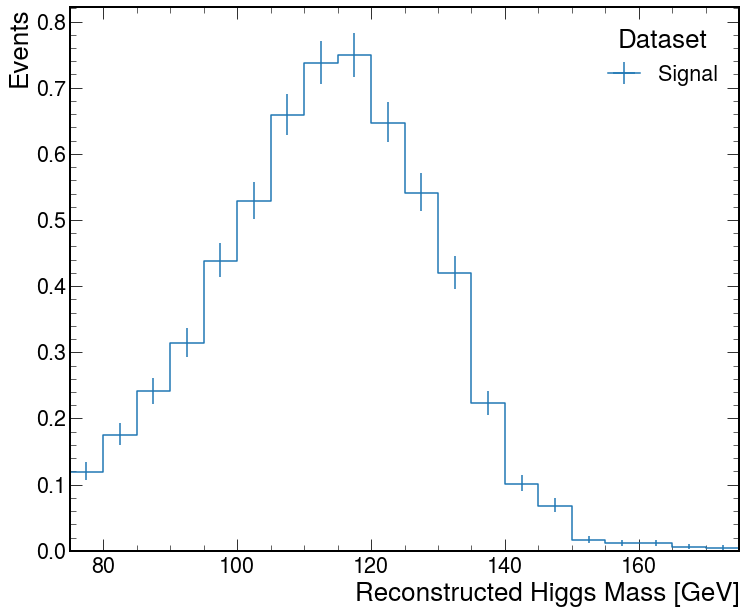

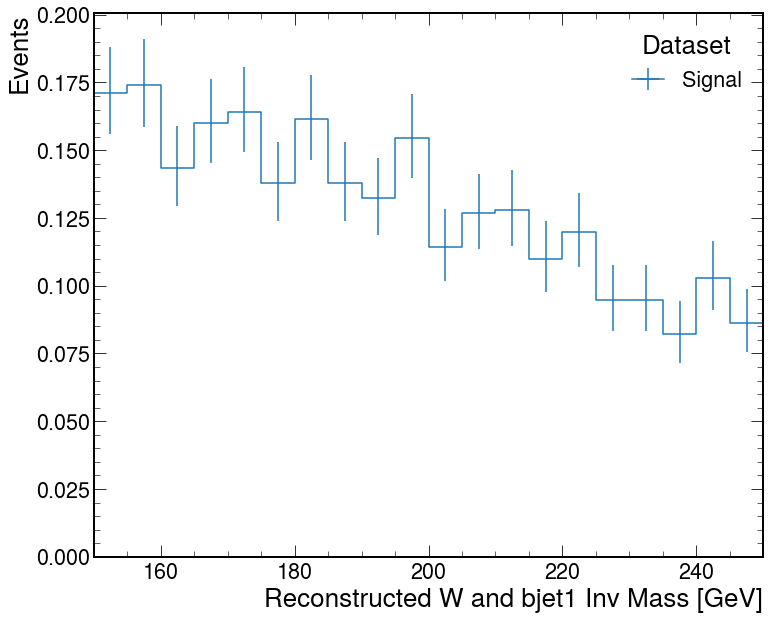

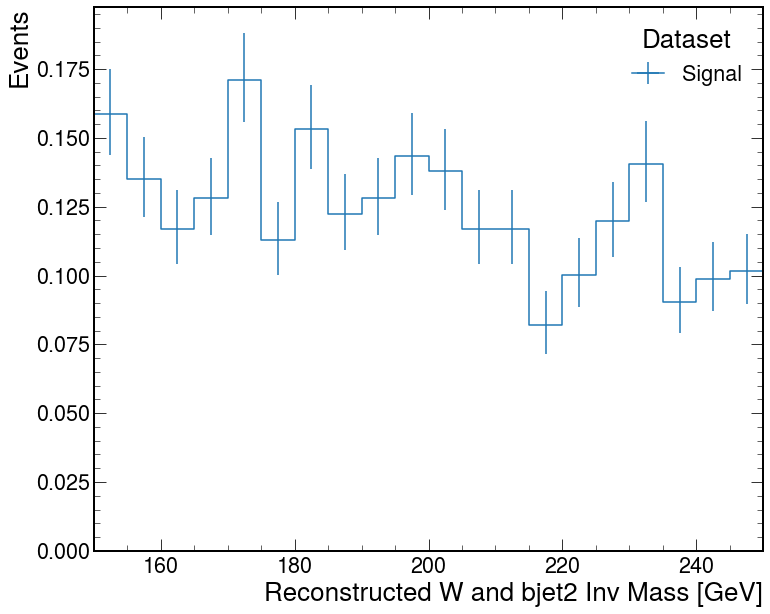

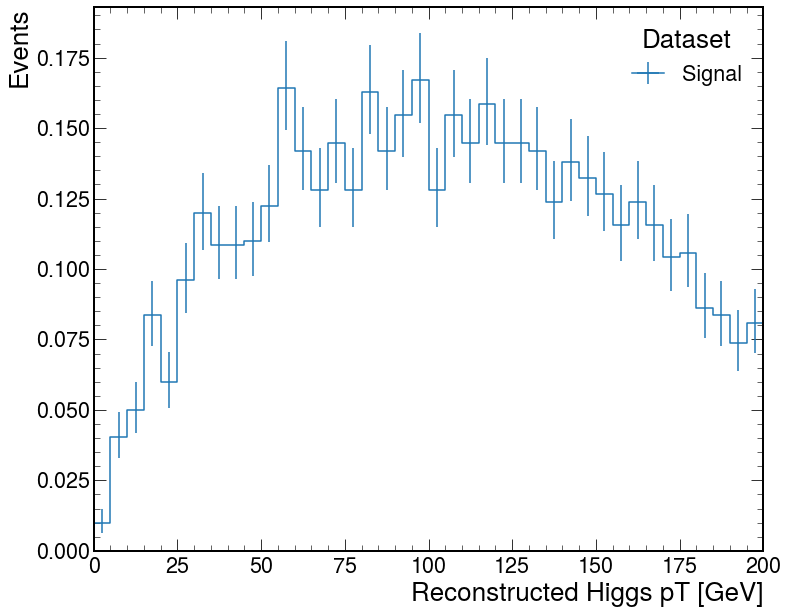

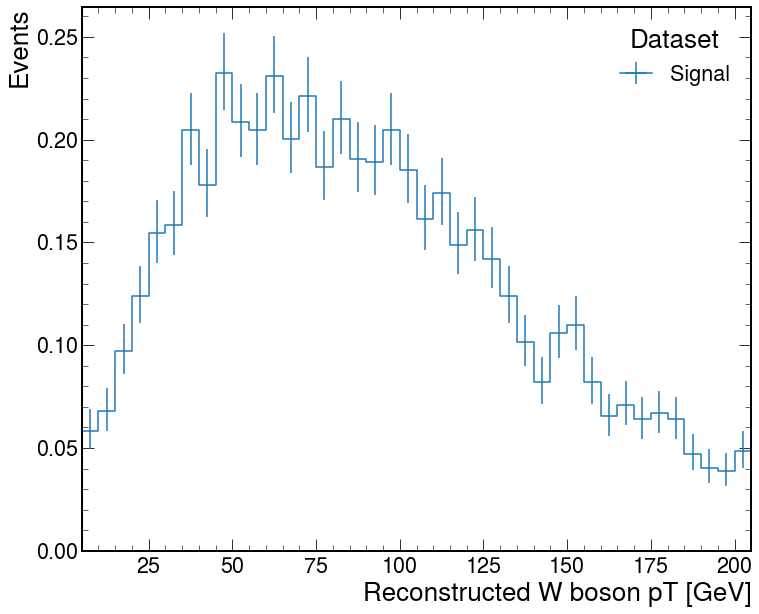

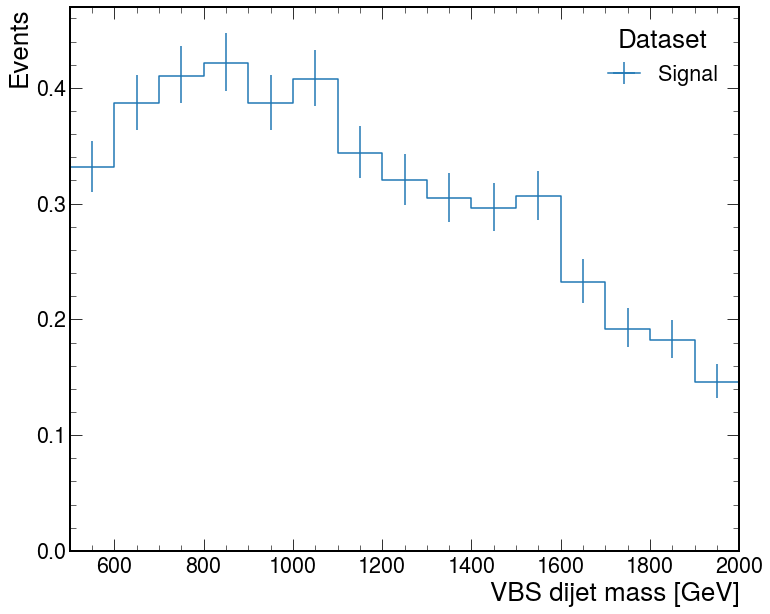

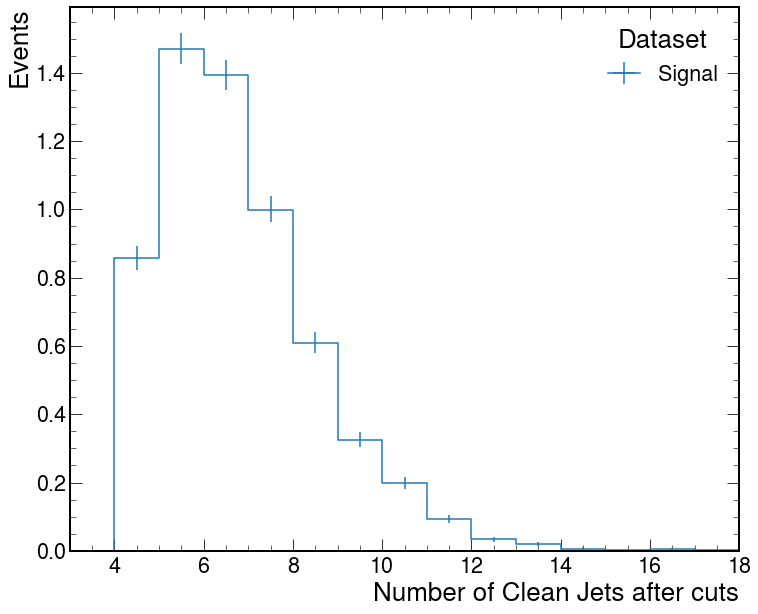

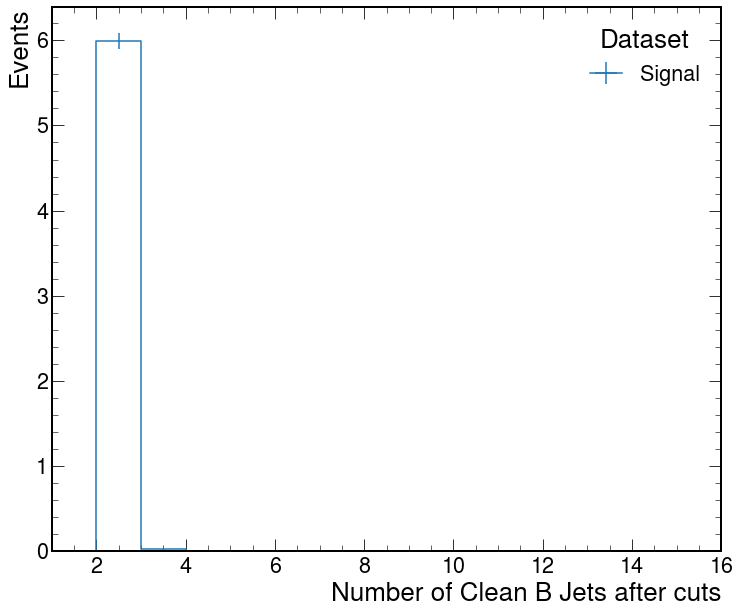

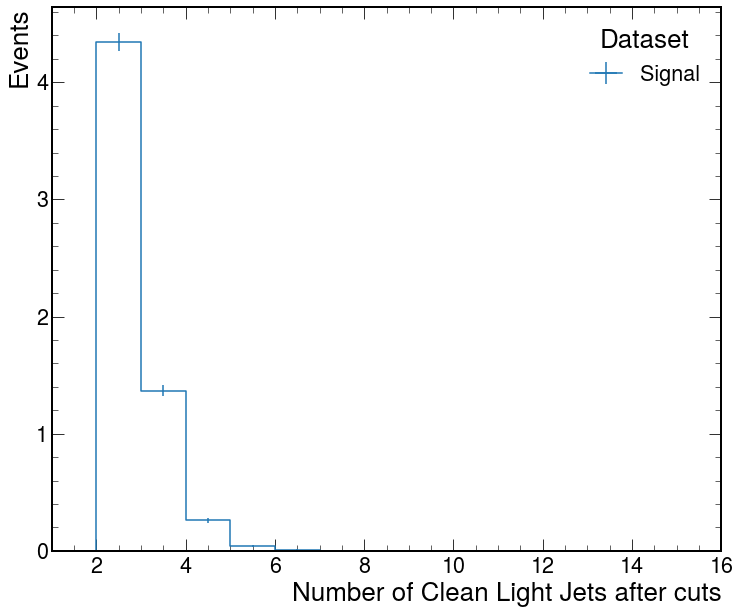

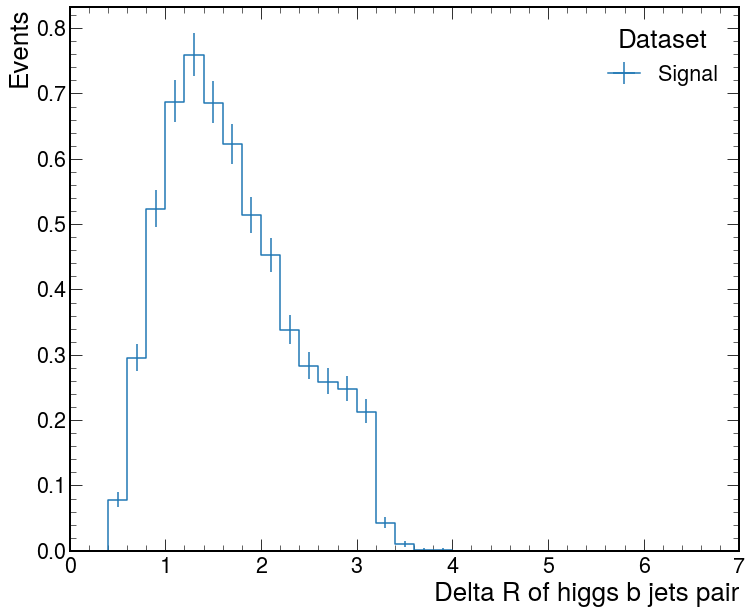

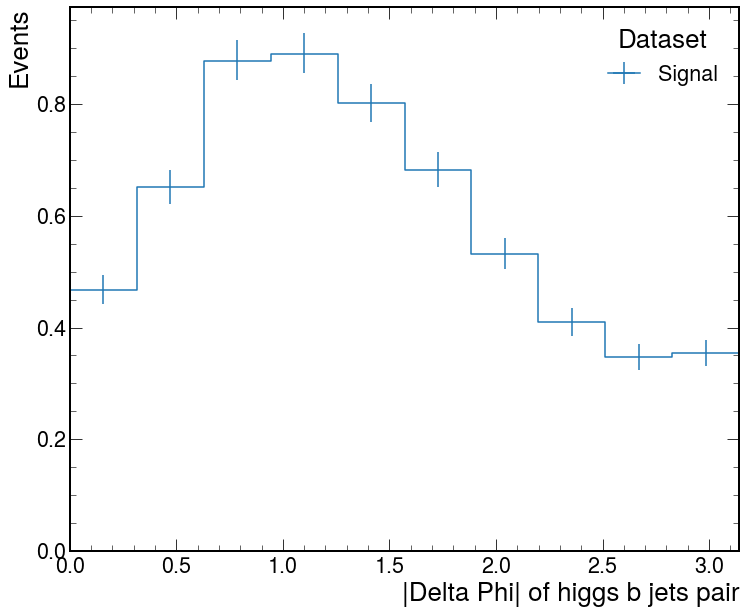

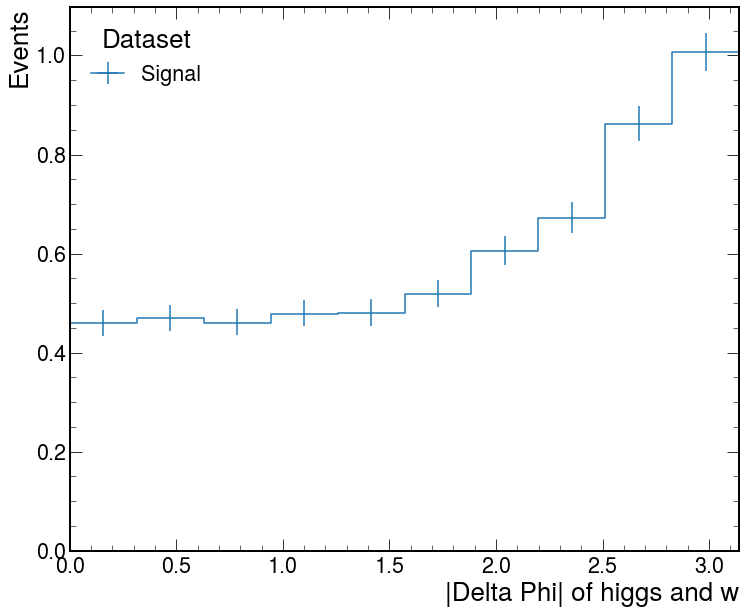

In [10]:
t = time.strftime("%Y-%m-%d,%H:%M:%S", time.localtime())
for key in keys:
    plt.figure(figsize = (12,10))
    ax = plt.subplot(111)
    ax1 = hist.plot1d(signalRes[key],ax = ax)
#     ax2 = hist.plot1d(topRes[key],ax = ax1, clear = False)
#     ax3 = hist.plot1d(wbjRes[key],ax = ax2, clear = False)
#     ax3.relim()
#     ax3.autoscale()
#     ax3.set_yscale("log")
#     plt.savefig(f"plots/WH_{t}-{key}.pdf")
    
    util.save(signalRes[key],f"old_{key}.hist")
    
#     hist.plot1d(signalRes[key])

#     plt.yscale("log")
#     ax2.set_ylim((0,100000))
# plt.subplot(223)
# hist.plot1d(wjetRes['vbsdijetmass'])